<a href="https://colab.research.google.com/github/yashshetty1409/Employee-Attrition-Prediction-Using-Machine-Learning/blob/main/EDA_yash_shetty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.svm import SVR
import seaborn as sns
warnings.simplefilter('ignore', FitFailedWarning)


In [ ]:
df = pd.read_csv('/eda_dataset.csv')

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<Figure size 1080x1080 with 0 Axes>

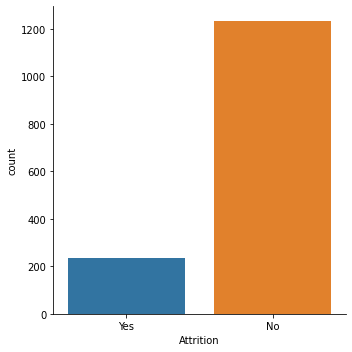

<Figure size 1080x1080 with 0 Axes>

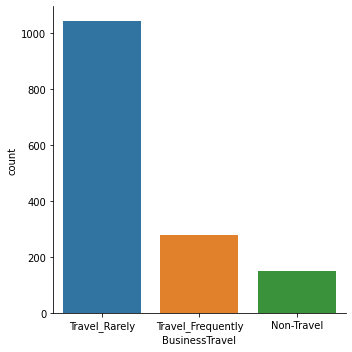

<Figure size 1080x1080 with 0 Axes>

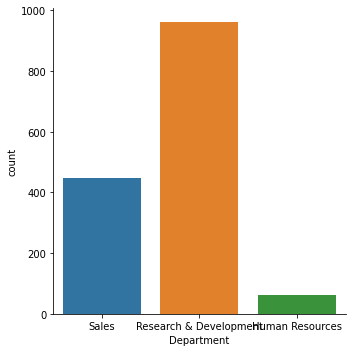

<Figure size 1080x1080 with 0 Axes>

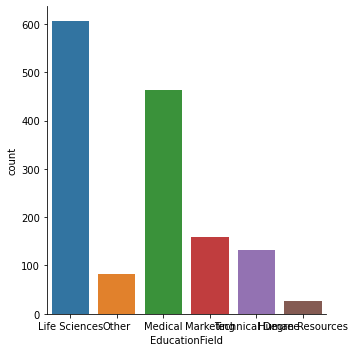

<Figure size 1080x1080 with 0 Axes>

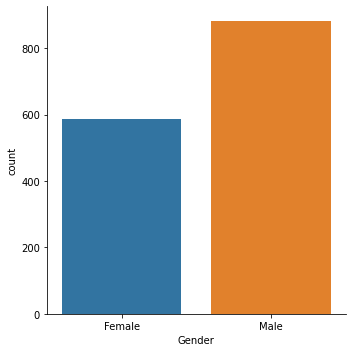

<Figure size 1080x1080 with 0 Axes>

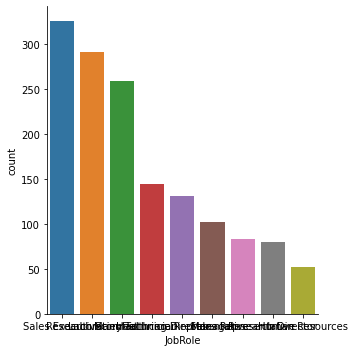

<Figure size 1080x1080 with 0 Axes>

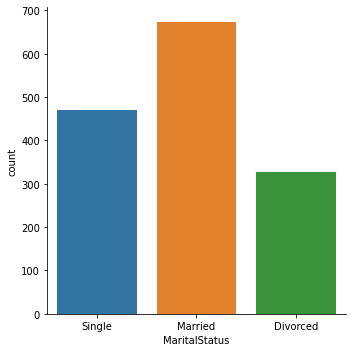

<Figure size 1080x1080 with 0 Axes>

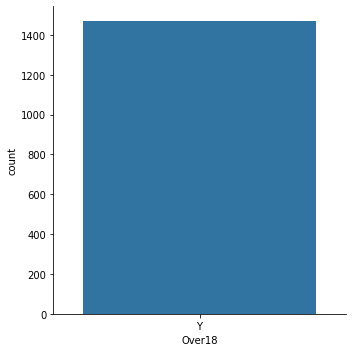

<Figure size 1080x1080 with 0 Axes>

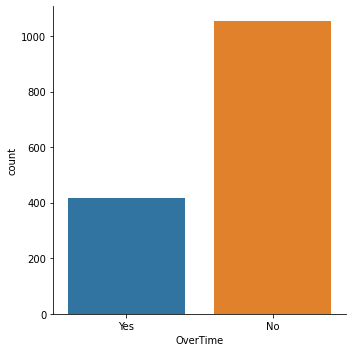

In [ ]:
cat_df=df.select_dtypes(include='object')

for i in cat_df:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=df,x=i,kind='count')

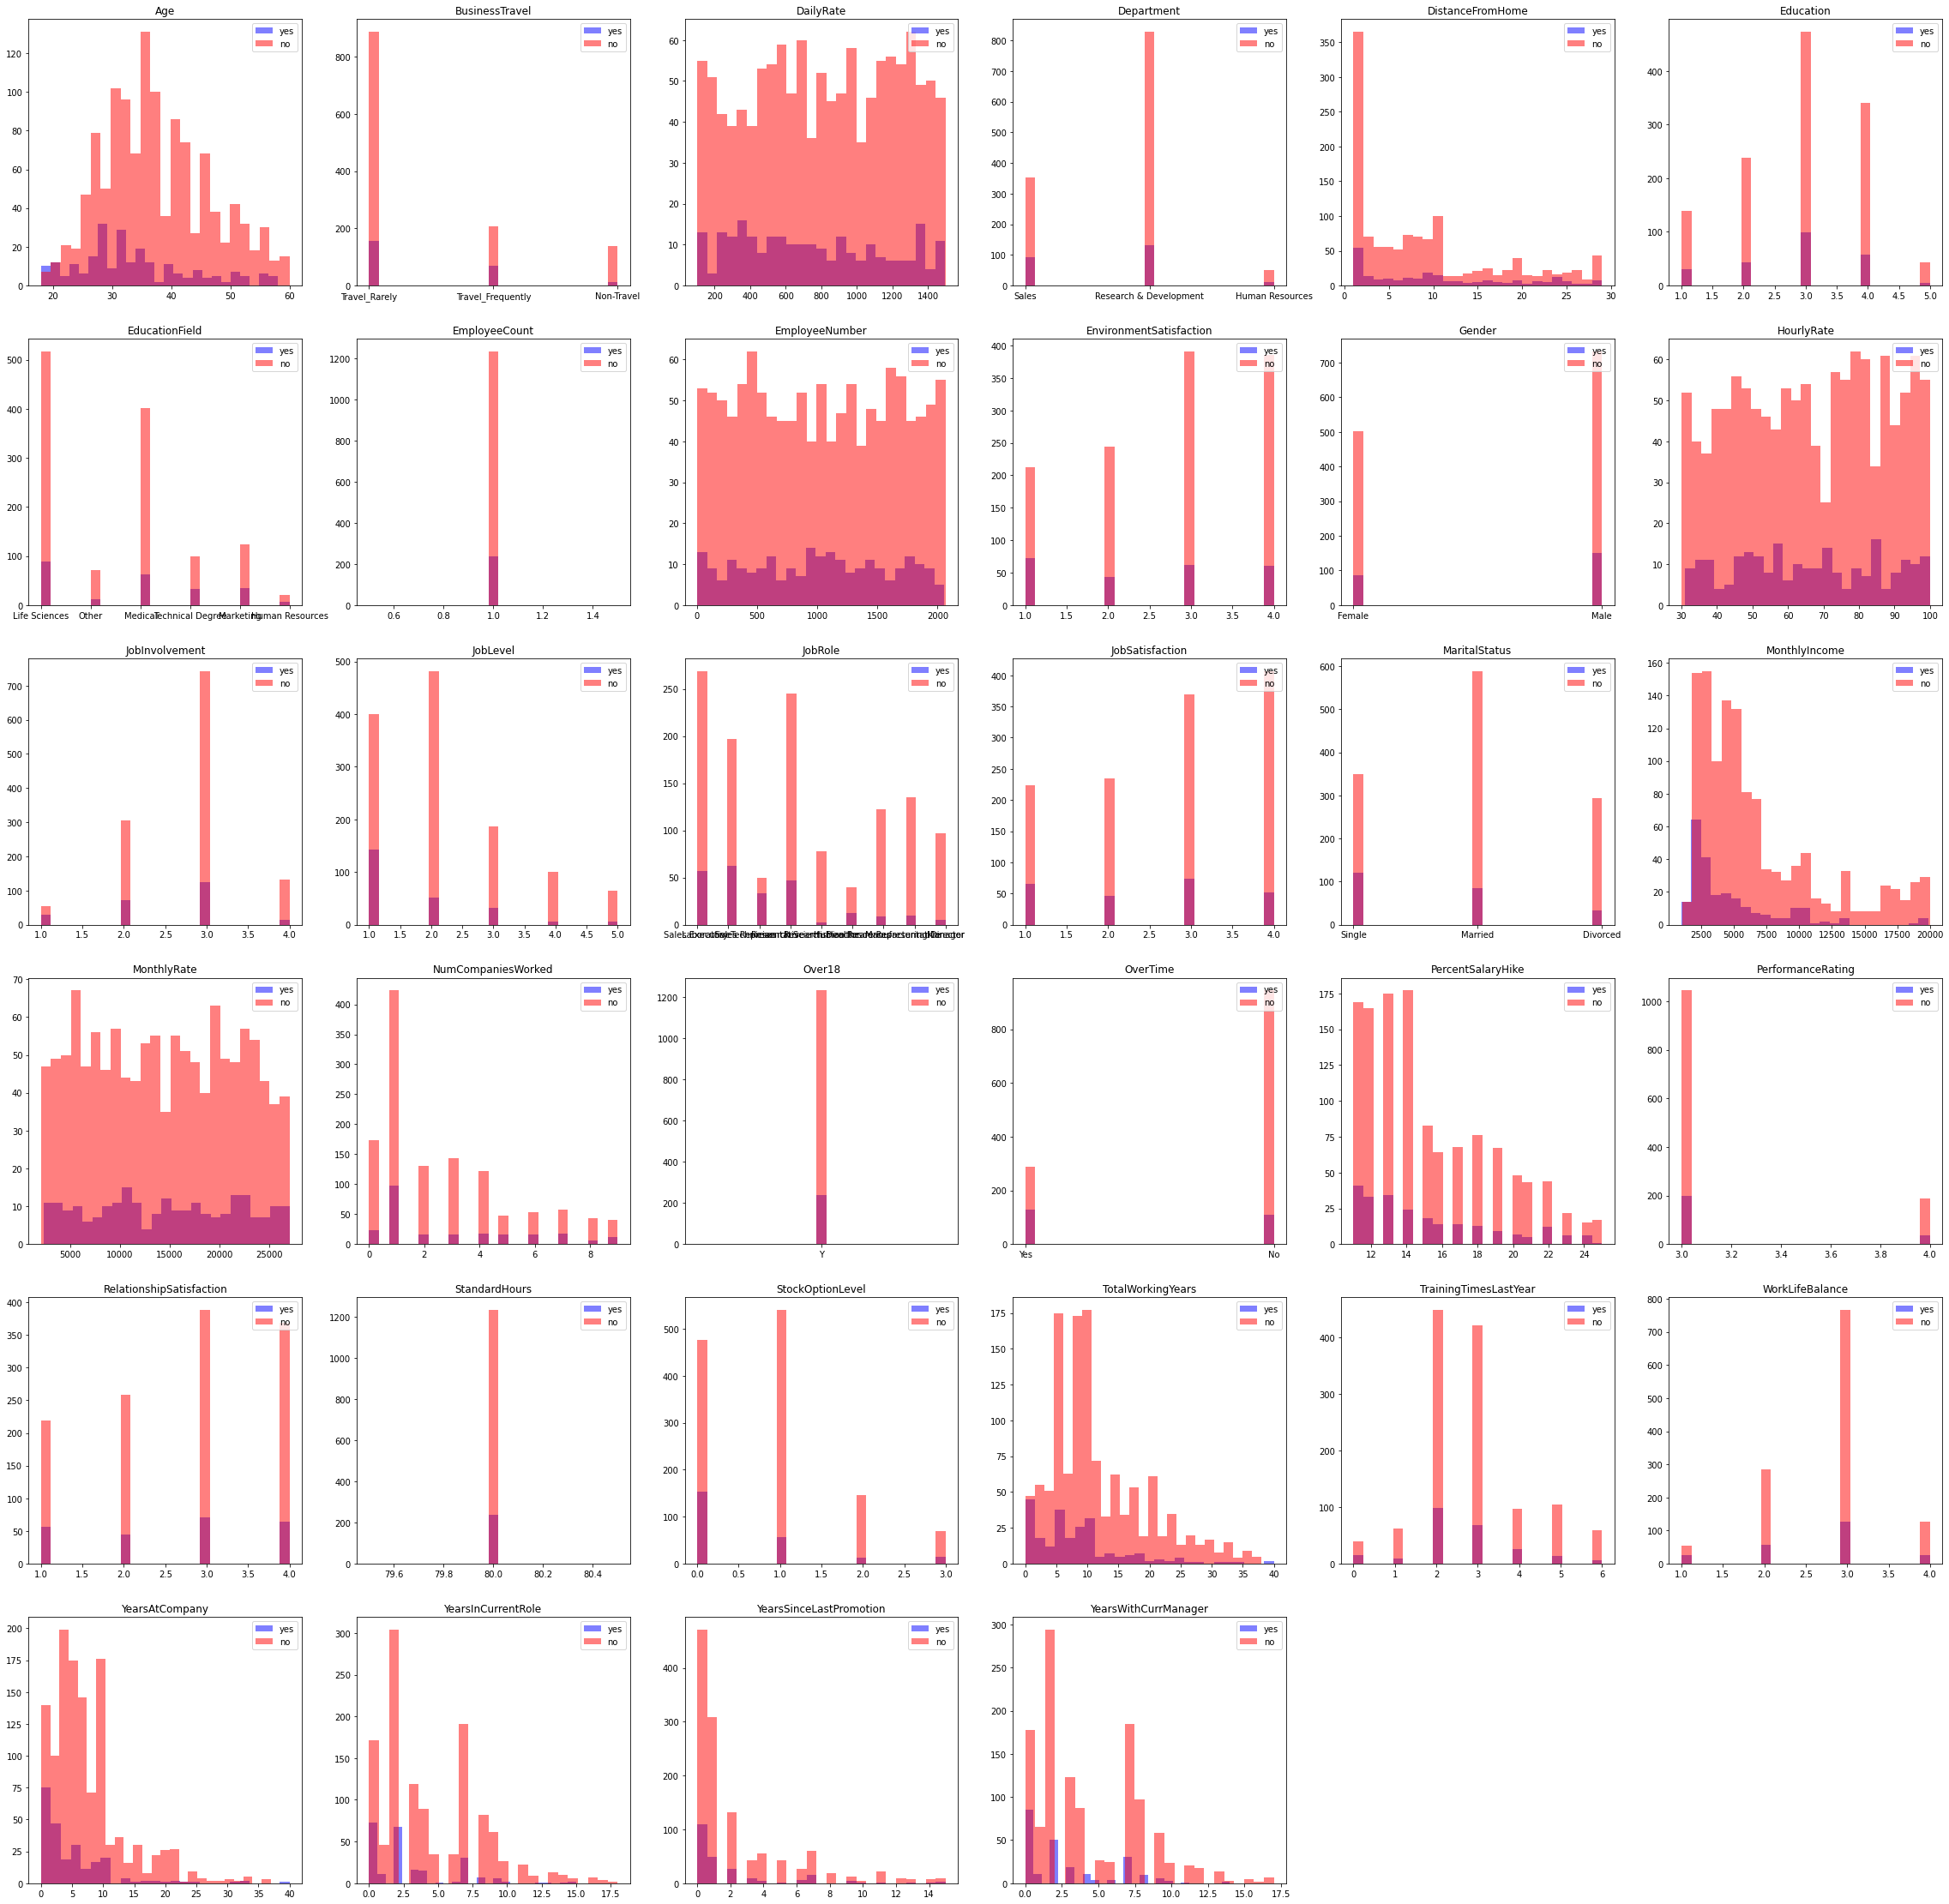

In [ ]:
#plot distributions
k=1
plt.figure(figsize=(40, 40))
for col in df:
  if col=="Attrition":
    continue
  yes = df[df['Attrition'] == 'Yes'][col]
  no = df[df['Attrition'] == 'No'][col]
  plt.subplot(6, 6, k)
  plt.hist(yes, bins=25, alpha=0.5, label='yes', color='b')
  plt.hist(no, bins=25, alpha=0.5, label='no', color='r')
  plt.legend(loc='upper right')
  plt.title(col)
  k+=1



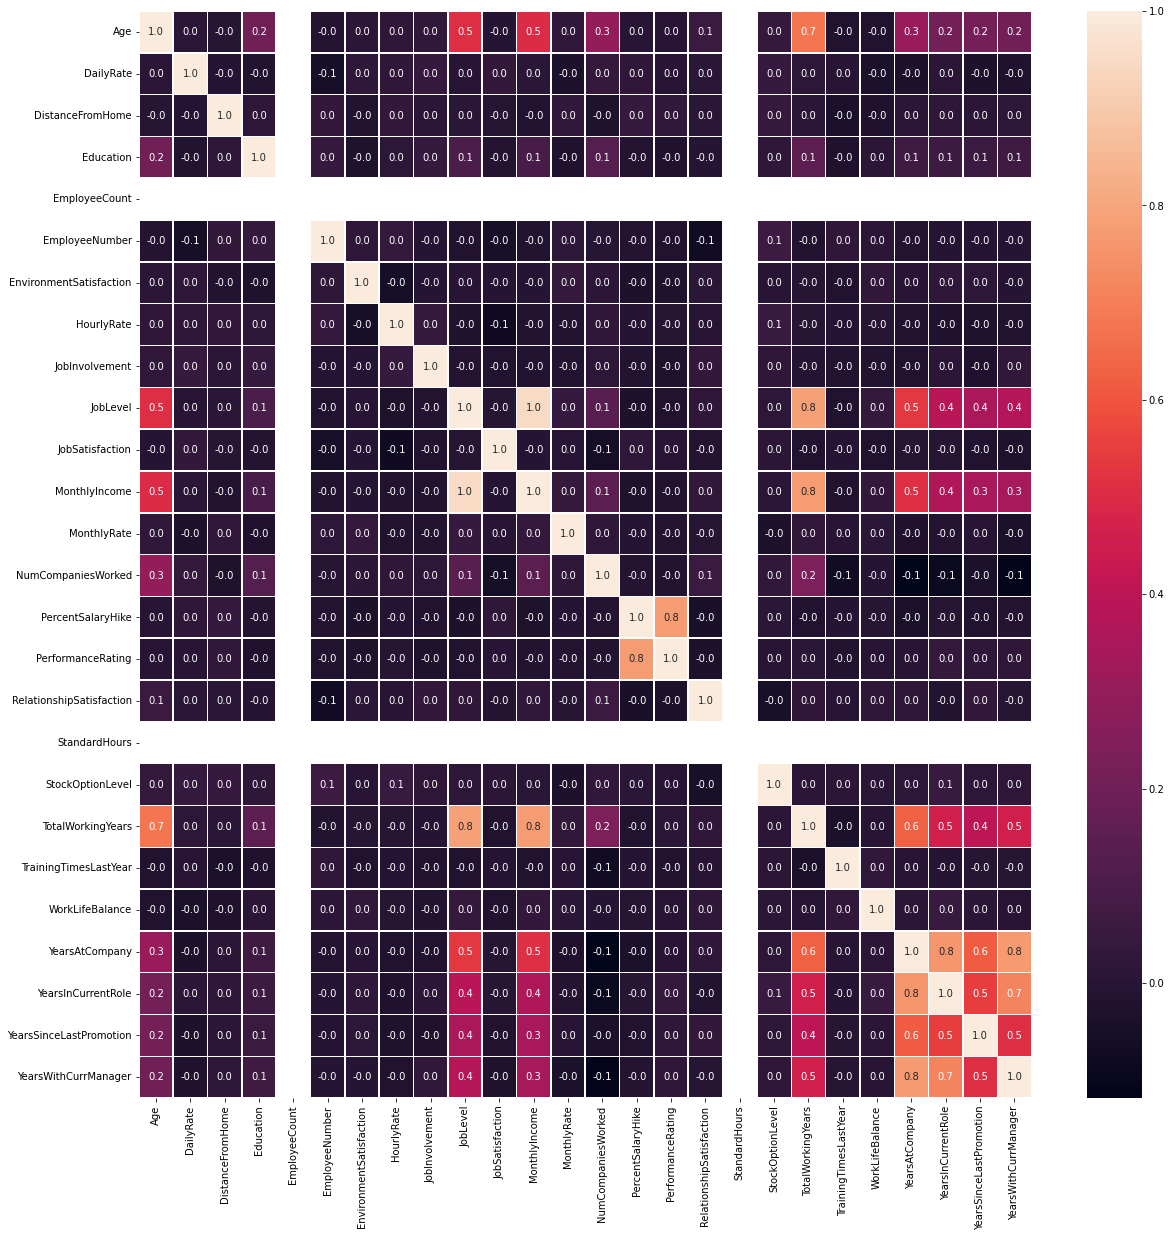

In [ ]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidth=.5,fmt='.1f')

**ADABOOST**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)


In [ ]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X,y)
X = pd.DataFrame(X_,columns=X.columns)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_estimators' : [10,50,250,1000],
      'learning_rate' : [0.001,0.01,0.1,1.0,10]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
decision_tree_parameters = {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.33334, 'max_leaf_nodes': 50, 'min_samples_leaf': 15, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
best_parameters_raw = tune_hyperparameters(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters)),X_train,y_train)


Best Params:  {'learning_rate': 0.1, 'n_estimators': 1000}


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

Accuracy:  0.981081081081081
Precision:  0.9773869346733668
Recall:  0.9873096446700508
F1 Score:  0.9823232323232323
Confusion Matrix:
 [[337   9]
 [  5 389]]


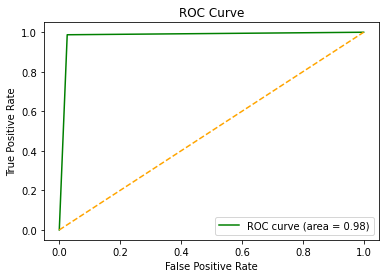

In [ ]:
train_predict_evaluate(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X_train,y_train,X_test)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

In [ ]:
cross_validation(AdaBoostClassifier(random_state=0,base_estimator=DecisionTreeClassifier(**decision_tree_parameters),**best_parameters_raw),X,y)


Accuracy:  0.9874263987320463
Precision:  0.9779849352589641
Recall:  0.9975708502024292
F1 Score:  0.9875969133638431


In [ ]:
import graphviz
from subprocess import check_call
from IPython.display import Image

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

[]

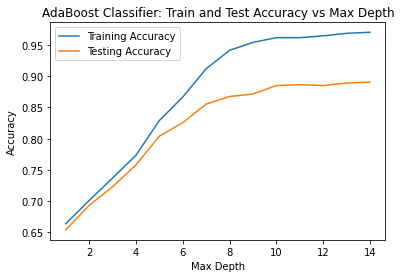

In [ ]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("AdaBoost Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

DECISION TREE

In [ ]:
pip install dtreeviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 924 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.svm import SVR
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


In [ ]:
df.isna().any().any()

False

In [ ]:
#Columns with string values
categorical_column = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [ ]:
Y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)


In [ ]:
ros = RandomOverSampler(random_state=42)
X_, Y = ros.fit_resample(X,Y)
X = pd.DataFrame(X_,columns=X.columns)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)


In [ ]:
import graphviz
from subprocess import check_call
from IPython.display import Image
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree, _tree
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, log_loss
import matplotlib.font_manager

In [ ]:
def decision_tree_maker(X_train, Y_train, X_test, Y_test, my_depth = 5):

  # train model
  dt = DecisionTreeClassifier(random_state = 0, max_depth = my_depth, criterion='entropy')
  dt.fit(X_train, Y_train)

  # test model 
  Y_pred = dt.predict(X_test)
  # metric evaluation
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Acuuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  dt_confusion_matrix = confusion_matrix(Y_test, Y_pred)
  print('Confusion Matrix:\n', dt_confusion_matrix)

  features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
  classes = ['No', 'Yes']

  # text representation of decision tree
  text_representation = export_text(dt, feature_names=features)
  print('------------ Text Representation of Decision Tree ----------')
  print(text_representation)

  np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
  # graphical represenation of decision tree, save to file 'decision_tree.png'
  dot_data = export_graphviz(dt, out_file ='tree.dot', feature_names=features, class_names=classes)
  check_call(['dot','-Tpng','tree.dot','-o','decision_tree.png'])

  # decision tree detailed visualisation
  viz = dtreeviz(dt, X_train, Y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)
  return viz

Acuuracy =  0.7469635627530364
F1 Score =  0.7228381374722838
Precision =  0.7874396135265701
Recall =  0.6680327868852459
Confusion Matrix:
 [[206  44]
 [ 81 163]]
------------ Text Representation of Decision Tree ----------
|--- OverTime <= 0.50
|   |--- TotalWorkingYears <= 2.50
|   |   |--- Age <= 32.50
|   |   |   |--- RelationshipSatisfaction <= 3.50
|   |   |   |   |--- class: 1
|   |   |   |--- RelationshipSatisfaction >  3.50
|   |   |   |   |--- class: 0
|   |   |--- Age >  32.50
|   |   |   |--- Department <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Department >  0.50
|   |   |   |   |--- class: 0
|   |--- TotalWorkingYears >  2.50
|   |   |--- StockOptionLevel <= 0.50
|   |   |   |--- JobSatisfaction <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- JobSatisfaction >  1.50
|   |   |   |   |--- class: 0
|   |   |--- StockOptionLevel >  0.50
|   |   |   |--- YearsAtCompany <= 31.50
|   |   |   |   |--- class: 0
|   |   |   |--- YearsAtCompany >  31.50
|   |   

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


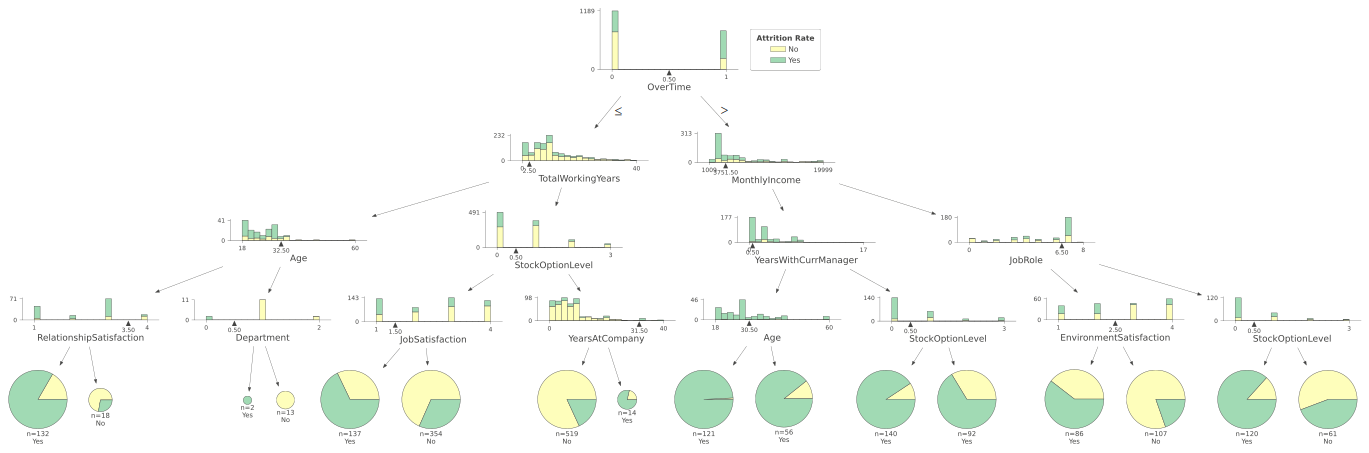

In [ ]:
decision_tree_maker(X_train, y_train, X_test, y_test, 4)


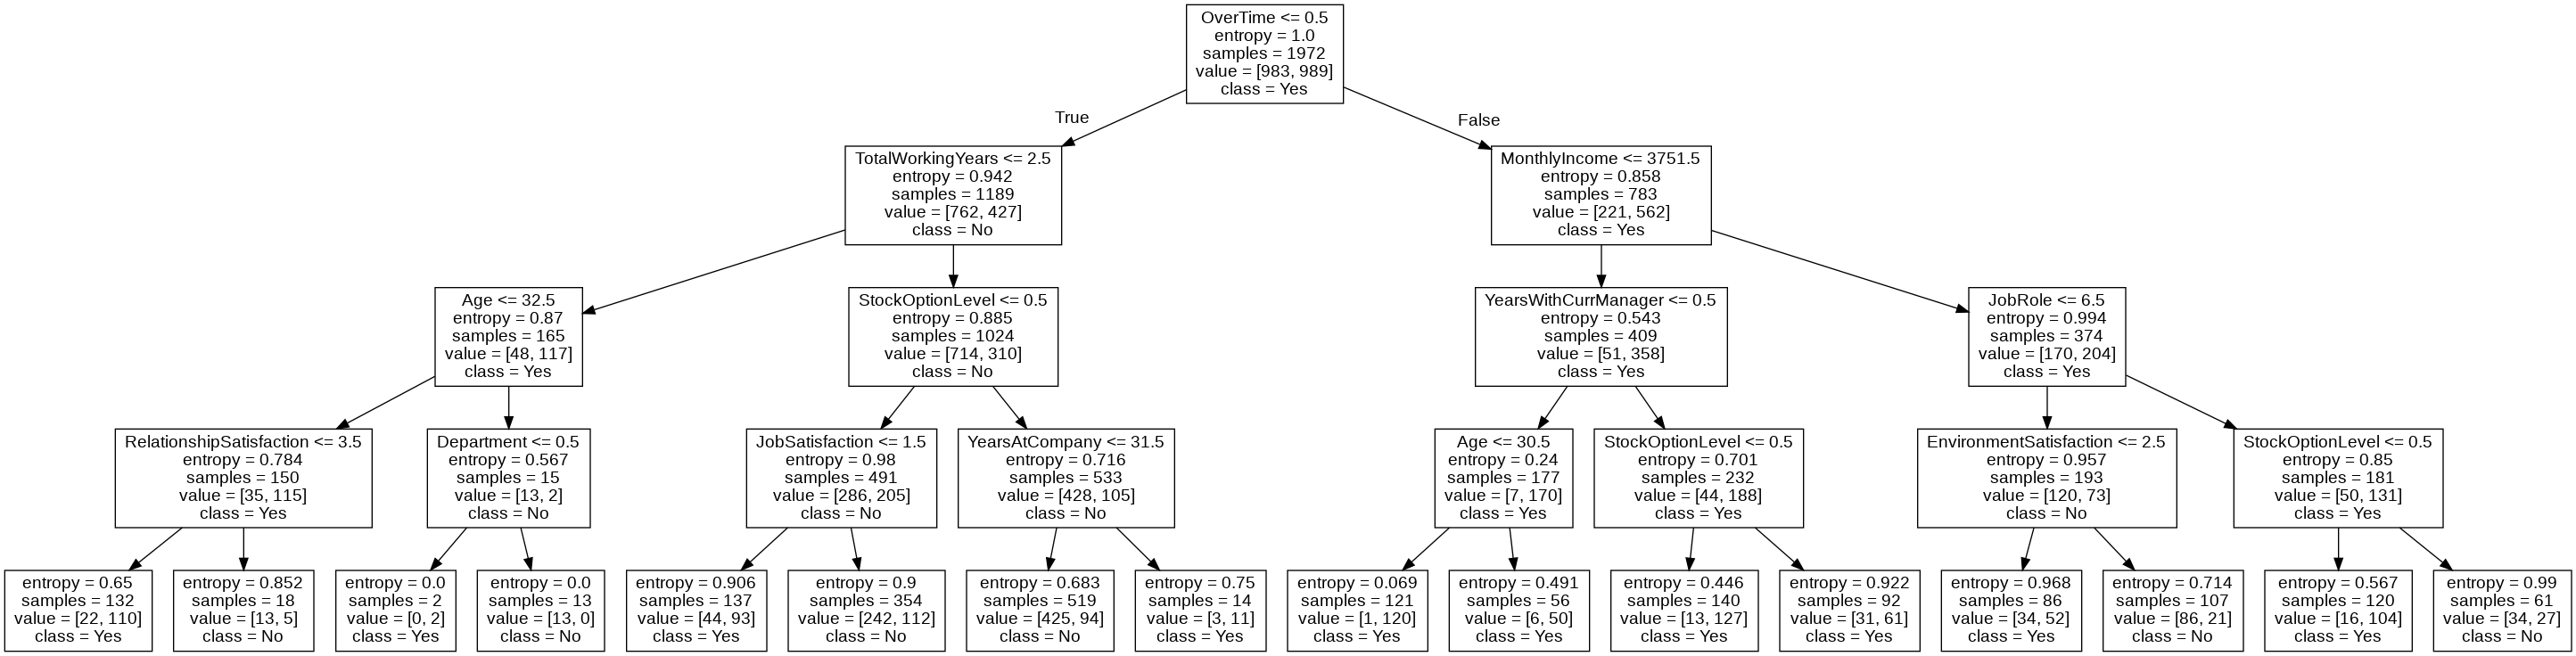

In [ ]:
Image('decision_tree.png')

In [ ]:
def get_feature_importance(dt, X_train):
  # feature importance
  # The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.
  for importance, name in sorted(zip(dt.feature_importances_, X_train.columns), reverse=True):
    print(name, importance)

  # plot
  plt.xticks(rotation='vertical')
  plt.bar(X_train.columns, dt.feature_importances_, align='edge', width=0.3)
  plt.xlabel("Features")
  plt.ylabel("Importance")
  plt.title("Feature Importance for the Decision tree")
  plt.show()

[]

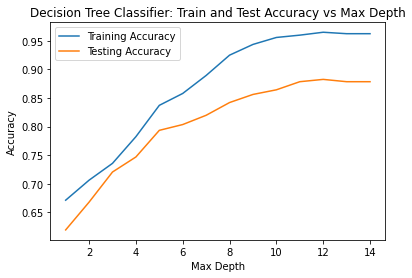

In [ ]:
dt_train_accuracy = []
dt_test_accuracy = []

# do GridSearch CV over different values
for i in np.arange(1, 15):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':[5, 10, 20, 50, 100],'random_state':[0]}
  dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
  dt.fit(X_train,y_train)
  y_train_pred = dt.predict(X_train)
  y_pred = dt.predict(X_test)
  s = accuracy_score(y_train, y_train_pred)
  dt_train_accuracy.append(s)
  dt_test_accuracy.append(accuracy_score(y_test, y_pred))

# plot graph
plt.title("Decision Tree Classifier: Train and Test Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.plot(np.arange(1,15), dt_train_accuracy, label="Training Accuracy")
plt.plot(np.arange(1,15), dt_test_accuracy, label="Testing Accuracy")
plt.legend()
plt.plot()

In [ ]:
# performing GridSearchCV on data to get best model hyperparameters
def gcv(X_train, Y_train, X_test, Y_test):

  # make scorer
  scoring = make_scorer(accuracy_score)

  # define parameters
  max_depth = [int(x) for x in np.linspace(2, 15, num=10)] 
  # max_depth.append(None)

  # perform GridSearchCV with given parameters
  g_cv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_depth': max_depth,
                            'max_features': ['auto', 'log2', 'sqrt', 0.33334],
                            'min_samples_leaf': [1, 2, 5, 10, 15, 20],
                            'min_samples_split': range(2, 10),
                            'max_leaf_nodes': [5, 10, 20, 50, 100],
                            'random_state': [0]},
                scoring=scoring, cv=5, refit=True)

  g_cv.fit(X_train, Y_train)

  # get best parameter values
  print(g_cv.best_params_)

  # train new model with best parameters
  dt_classifier = DecisionTreeClassifier(**g_cv.best_params_).fit(X_train, Y_train)
  Y_pred = dt_classifier.predict(X_test)
  dt_accuracy = accuracy_score(Y_test, Y_pred)
  print('Accuracy = ', dt_accuracy)
  dt_f1 = f1_score(Y_test, Y_pred)
  print('F1 Score = ', dt_f1)
  dt_precision = precision_score(Y_test, Y_pred)
  print('Precision = ', dt_precision)
  dt_recall = recall_score(Y_test, Y_pred)
  print('Recall = ', dt_recall)
  return dt_classifier, g_cv.best_params_, dt_accuracy

In [ ]:
dt_classifier, best_params_raw, accuracy_cv = gcv(X_train, y_train, X_test, y_test)


In [ ]:
# train new model with best parameters
dt_classifier = DecisionTreeClassifier(**best_params_raw).fit(X_train, y_train)
Y_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, Y_pred)
print('Accuracy = ', dt_accuracy)
dt_f1 = f1_score(y_test, Y_pred)
print('F1 Score = ', dt_f1)
dt_precision = precision_score(y_test, Y_pred)
print('Precision = ', dt_precision)
dt_recall = recall_score(y_test, Y_pred)
print('Recall = ', dt_recall)
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',  'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
classes = ['No', 'Yes']
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# graphical represenation of decision tree, save to file 'decision_tree.png'
dot_data = export_graphviz(dt_classifier, out_file ='tree_best.dot', feature_names=features, class_names=classes)
check_call(['dot','-Tpng','tree_best.dot','-o','decision_tree_best.png'])
dtreeviz(dt_classifier, X_train, y_train, target_name="Attrition Rate",feature_names=features, class_names=classes)

In [ ]:
def cross_validation(model, X, y, my_cv = 5):
  scores = cross_validate(model, X, y, cv=my_cv, scoring=('accuracy','precision','recall','f1'))
  print(scores)
  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))


In [ ]:
cross_validation(DecisionTreeClassifier(**best_params_raw), X, Y, 5)


In [ ]:
get_feature_importance(dt_classifier, X_train)


# **KNeighborsClassifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from imblearn.over_sampling import RandomOverSampler

In [ ]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [ ]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X,y)
X = pd.DataFrame(X_,columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

In [ ]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)

In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)


In [ ]:
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)


In [ ]:
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)


In [ ]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [ ]:
metrics = []


In [ ]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,y))


In [ ]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,y))


In [ ]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,y))


In [ ]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

In [ ]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

In [ ]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

In [ ]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

In [ ]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

**Linear** **Discrimant** **Analysis** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [ ]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

In [ ]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)


In [ ]:
ros = RandomOverSampler(random_state=42)
X_, y = ros.fit_resample(X,y)
X = pd.DataFrame(X_,columns=X.columns)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {"solver":['svd', 'lsqr', 'eigen'], "shrinkage":['auto',0.1,0.01,1,0]}
  grid_search = GridSearchCV(model,param_grid=param_grid,scoring='accuracy')
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

In [ ]:
best_params = tune_hyperparameters(LinearDiscriminantAnalysis(),X_train,y_train)
best_params


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,zero_division=0))
  print("Recall: ",recall_score(y_test,y_pred,zero_division=0))
  print("F1 Score: ",f1_score(y_test,y_pred,zero_division=0))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()


In [ ]:
train_predict_evaluate(LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'),X_train,y_train,X_test)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [ ]:
metrics = []


In [ ]:
metrics.append(cross_validation(LinearDiscriminantAnalysis(**best_params),X,y))


**MLP Classifier**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from imblearn.over_sampling import RandomOverSampler

In [ ]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)


In [ ]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)


In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'activation' : ['identity','logistic','tanh','relu'],
      'solver': ['lbfgs','sgd','adam'],
      'alpha': [0.0001,0.05]
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()


In [ ]:
train_predict_evaluate(MLPClassifier(max_iter=100000,random_state=0),X_train,y_train,X_test)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics


In [ ]:
metrics = []


In [ ]:
metrics.append(cross_validation(MLPClassifier(max_iter=100000,random_state=0),X,y))


**RandomForest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)


In [ ]:
df.isna().any().any()


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
# Setting random state for randomization
rf = RandomForestClassifier(random_state=42)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Taking a huge range of values to get nearer to optimal parameters

# Parameters to check
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)


In [ ]:
train_predict_evaluate (rf_random, X_train, y_train, X_test)


In [ ]:
rf_random.best_params_


In [ ]:
from sklearn.model_selection import GridSearchCV

# After getting near to optimal values, using Random Search CV, 
# we now check for close values using Grid Search CV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [100, 105, 110, 115],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [250,300,350,400]
}


In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search, X_train, y_train, X_test)


In [ ]:
grid_search.best_params_

In [ ]:
best_rf = RandomForestClassifier(bootstrap=False, max_depth=100, 
                                 min_samples_leaf=1,min_samples_split=2, 
                                 n_estimators=250, random_state=42)
train_predict_evaluate (best_rf, X_train, y_train, X_test)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  print("Accuracy: ", np.mean(scores['test_accuracy']))
  print("Precision: ", np.mean(scores['test_precision']))
  print("Recall: ", np.mean(scores['test_recall']))
  print("F1 Score: ", np.mean(scores['test_f1']))


In [ ]:
cross_validation(rf, X, y)


In [ ]:
cross_validation(best_rf, X, y)


In [ ]:
feature_imp = pd.Series(best_rf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
print(feature_imp)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot using sns
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()


**SVC**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from imblearn.over_sampling import RandomOverSampler


In [ ]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)


In [ ]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)


In [ ]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'C' : [0.1,1,10,100,1000],
      'kernel' : ['linear','rbf']
  }

  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_


In [ ]:
best_parameters_std = tune_hyperparameters(SVC(random_state=0),X_train_standardized,y_train)


In [ ]:
best_parameters_norm = tune_hyperparameters(SVC(random_state=0),X_train_normalized,y_train)


In [ ]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()


In [ ]:
train_predict_evaluate(SVC(random_state=0),X_train,y_train,X_test)


In [ ]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_std),X_train_standardized,y_train,X_test_standardized)


In [ ]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)


In [ ]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics


In [ ]:
metrics = []


In [ ]:
metrics.append(cross_validation(SVC(random_state=0),X,y))


In [ ]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_std),X_standardized,y))


In [ ]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_norm),X_normalized,y))


In [ ]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()


In [ ]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()


In [ ]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()


In [ ]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()


In [ ]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()
